## Klasifikasikan apakah seorang pasien positif diabetes atau tidak.

Sumber Data : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd

#import data
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#cek data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Pra-proses Data

In [3]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

In [4]:
from sklearn.preprocessing import StandardScaler
 
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Tujuan: Mengubah fitur sehingga memiliki mean 0 dan standar deviasi 1.

### Split Data

In [5]:
from sklearn.model_selection import train_test_split
 
# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

### Latih Data

In [6]:
from sklearn.svm import SVC
 
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

Skor Akurasi: 0.76
Confusion Matrix:
[[142  26]
 [ 36  50]]


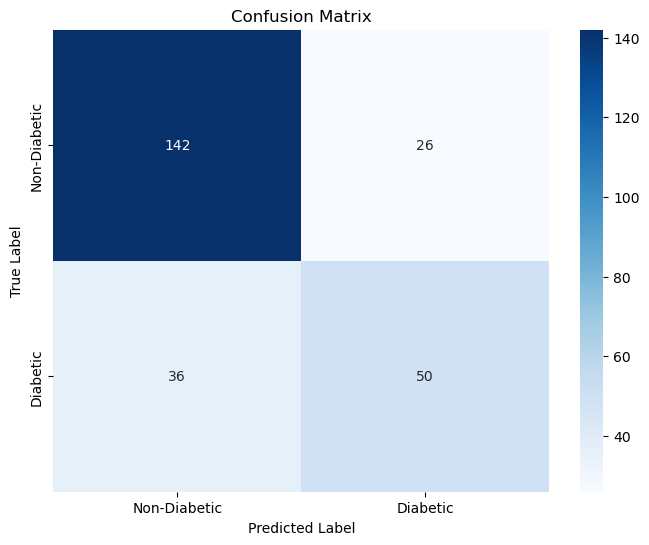

In [9]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat prediksi pada data uji
y_pred = clf.predict(X_test)

# Menampilkan skor akurasi prediksi
accuracy = clf.score(X_test, y_test)
print(f'Skor Akurasi: {accuracy:.2f}')

# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Dalam Confusion Matrix
- 142 sampel Non-Diabetic diklasifikasikan dengan benar (True Negatives).
- 26 sampel Non-Diabetic diklasifikasikan sebagai Diabetic (False Positives).
- 36 sampel Diabetic diklasifikasikan sebagai Non-Diabetic (False Negatives).
- 50 sampel Diabetic diklasifikasikan dengan benar (True Positives).

In [10]:
# Menampilkan laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic'])
print('Laporan Klasifikasi:')
print(report)

Laporan Klasifikasi:
              precision    recall  f1-score   support

Non-Diabetic       0.80      0.85      0.82       168
    Diabetic       0.66      0.58      0.62        86

    accuracy                           0.76       254
   macro avg       0.73      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



Precision: Proporsi prediksi positif yang benar-benar positif.

- Untuk Non-Diabetic: 0.80 (80% dari prediksi Non-Diabetic benar-benar Non-Diabetic).
- Untuk Diabetic: 0.66 (66% dari prediksi Diabetic benar-benar Diabetic).

Recall: Proporsi sampel positif yang berhasil diidentifikasi dengan benar.

- Untuk Non-Diabetic: 0.85 (85% dari sampel Non-Diabetic berhasil diklasifikasikan dengan benar).
- Untuk Diabetic: 0.58 (58% dari sampel Diabetic berhasil diklasifikasikan dengan benar).

Macro Avg: Rata-rata dari precision, recall, dan F1-score tanpa memperhatikan jumlah sampel tiap kelas.

- Precision: 0.73
- Recall: 0.71
- F1-Score: 0.72

Weighted Avg: Rata-rata dari precision, recall, dan F1-score yang dipertimbangkan dengan jumlah sampel tiap kelas.

- Precision: 0.75
- Recall: 0.76
- F1-Score: 0.75